## 07-10 케라스 서브클래싱 API(Keras Subclassing API)

케라스의 구현 방식에는 Sequential API, Functional API 외에도 Subclassing API라는 구현 방식이 존재합니다.  
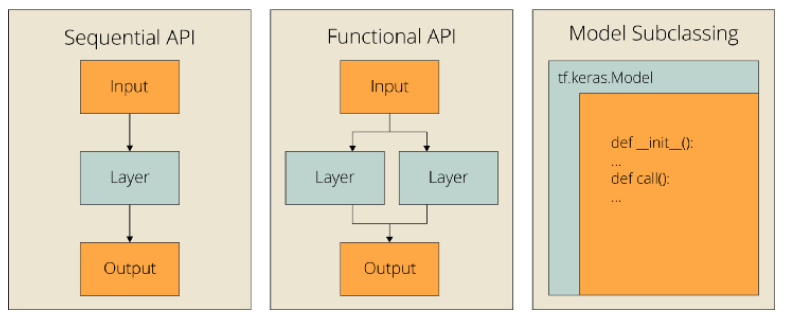

### 서브클래싱 API로 구현한 선형 회귀

In [1]:
import tensorflow as tf

class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred
  
model = LinearRegression()

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300)

Epoch 1/300


ValueError: in user code:

    File "c:\Users\82105\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\82105\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\82105\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\82105\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\82105\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\82105\AppData\Local\Temp\__autograph_generated_fileyke1px3q.py", line 10, in tf__call
        y_pred = ag__.converted_call(ag__.ld(self).linear_layer, (ag__.ld(x),), None, fscope)

    ValueError: Exception encountered when calling layer 'linear_regression' (type LinearRegression).
    
    in user code:
    
        File "C:\Users\82105\AppData\Local\Temp\ipykernel_216360\1973374050.py", line 9, in call  *
            y_pred = self.linear_layer(x)
        File "c:\Users\82105\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "c:\Users\82105\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
            raise ValueError(
    
        ValueError: Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    
    Call arguments received by layer 'linear_regression' (type LinearRegression):
      • x=tf.Tensor(shape=(None,), dtype=int32)


### 언제 서브클래싱 API를 써야 할까?

대부분의 딥 러닝 모델은 Functional API 수준에서도 전부 구현이 가능합니다. Subclassing API는 밑바닥부터 새로운 수준의 아키텍처를 구현해야 하는 실험적 연구를 하는 연구자들에게 적합합니다.

### 세 가지 구현 방식 비교

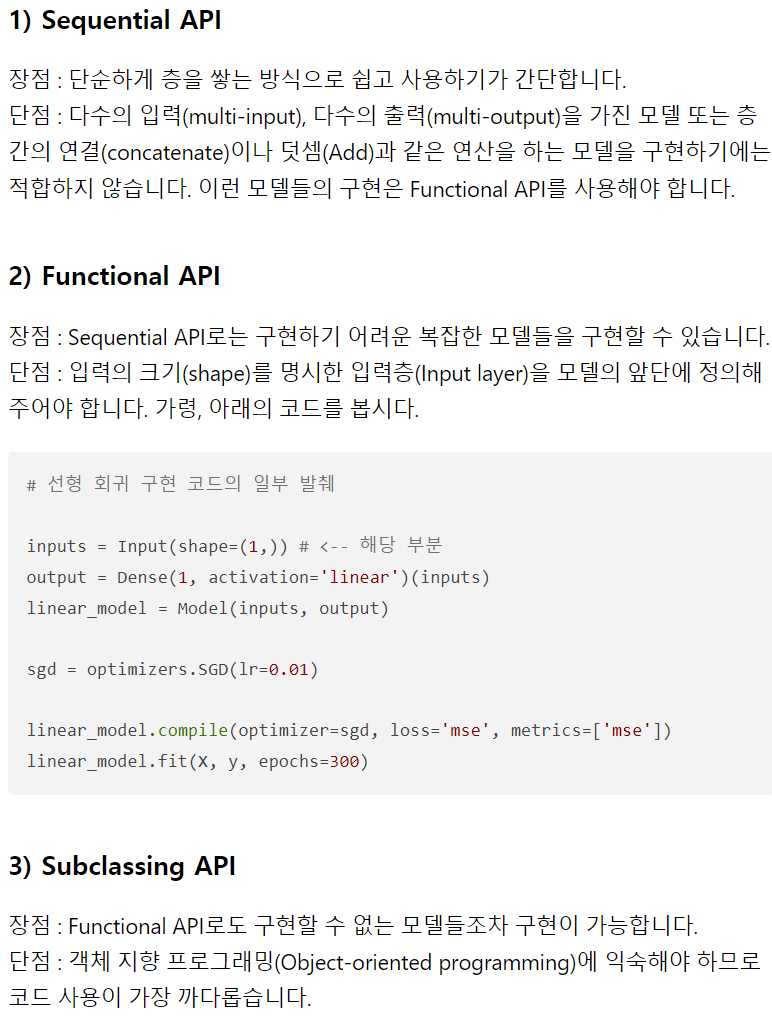